# Getting Started with Lucky Parking Los Angeles Citation Data

Here is some code and data to get new data scientists and analysts started. To use this notebook, please ask Lucky Parking leaders to give access to the Lucky Parking Google Drive. This notebook loads a 20% sampling of the data that has been processed using code in the citation-analysis branch. 

Get started by saving your own version and doing your own analysis. Go to 'File' and select 'Save a copy in Drive'. Make sure you're saving it to your own Google Drive account.

In [ ]:
# Allowing Google Colab to access the data stored in the Lucky Parking Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Importing basic data analysis and visualization packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Optional packages for geospatial analysis
# !pip install geopandas
# import geopandas as gpd
# from pyproj import Transformer

Mounted at /content/drive


In [ ]:
# Load 20% sampling of processed citation data with Pandas and low_memory=False parameter
df = pd.read_csv(
    '/content/drive/Shareddrives/Lucky Parking Drive/Lucky Parking Folder/Data/2022-03-14_processed_02samp.csv', 
    low_memory=False,
    index_col='index'
    )
df.sample(5)

,state_plate,make,body_style,color,location,violation_code,violation_description,fine_amount,datetime,make_ind,latitude,longitude,weekday
index,,,,,,,,,,,,,
644759,CA,Dodge,PU,GY,17800 SUPERIOR ST,80.56E4+,RED ZONE,93,2017-11-01 01:28:00,9,34.246753,-118.521614,Wednesday
1393262,CA,Toyota,PA,SL,6916 DE LONGPRE AVE,80.69BS,NO PARK/STREET CLEAN,73,2018-08-21 12:18:00,0,34.096156,-118.340651,Tuesday
1306945,AZ,Hyundai,PA,RD,14900 VENTURA BL,88.13B+,METER EXP.,63,2018-05-03 12:59:00,8,34.152361,-118.457421,Thursday
1636766,CA,Dodge,PA,BK,7900 MORELLA AVE,80.69BS,NO PARK/STREET CLEAN,73,2019-06-20 08:57:00,9,34.213902,-118.389965,Thursday
1806351,CA,Toyota,PA,GY,5131 DE LONGPRE AVE,22500E,BLOCKING DRIVEWAY,68,2020-10-03 08:33:00,0,34.096667,-118.301212,Saturday


In [ ]:
# Convert datetime to datetime format and set as index
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True, drop=True)

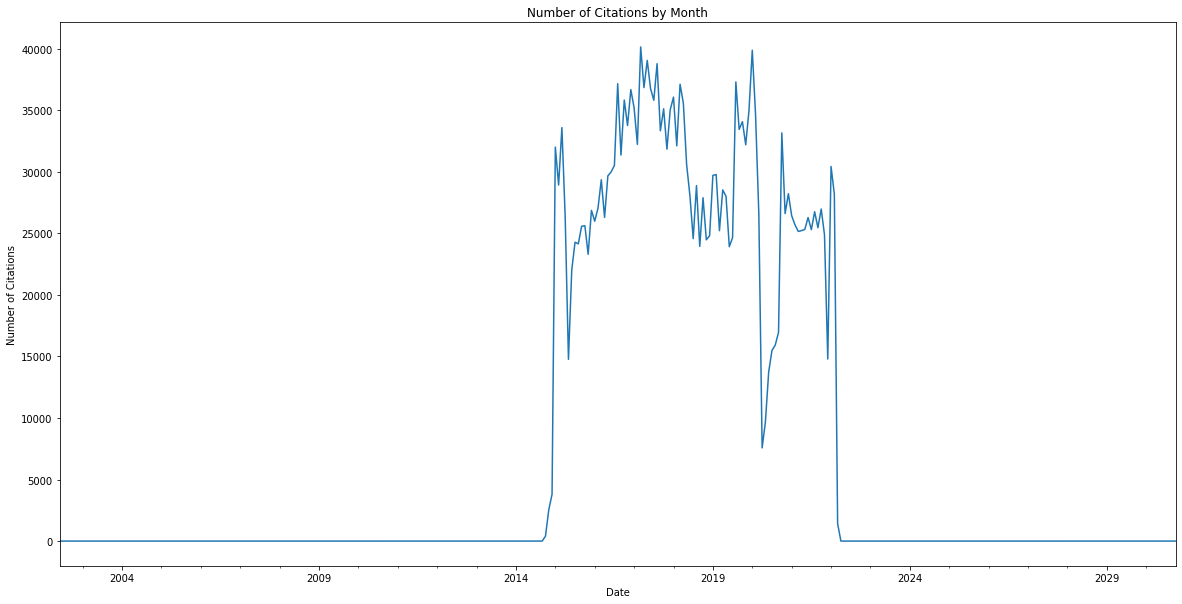

In [ ]:
# Plot of number of citations per month
plt.figure(figsize=(20,10))
df.resample('1M')['state_plate'].count().plot()
plt.ylabel('Number of Citations')
plt.title('Number of Citations by Month')
plt.xlabel('Date')
plt.show()